# Trabajo Práctico N°1 Aprendizaje Automático 1#
## Integrantes ##
1. López Ceratto, Julieta : L-3311/1
2. Rodríguez Griñó, Tomás : R-4643/4
3. Slepoy, David: S-5782/7

Importamos librerías necesarias.        

In [111]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Cargamos el dataset house-prices-tp.csv 

In [112]:
df = pd.read_csv('src\house-prices-tp.csv', sep = ',')

In [113]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


# Análisis descriptivo #

En este apartado se realiza un análisis descriptivo de cada variable.

Primero se divide el dataset en conjuntos de training, validación y test.

In [114]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [115]:
# Paso 1: Dividir en train+val y test (20% para test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Dividir train+val en train y validation (30% de train+val para validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

## 1. Análisis, visualización de variables y decisión sobre datos faltantes. ##

In [116]:
#Miramos que columnas tienen datos faltantes
X_train.isnull().sum()

CRIM       12
ZN         14
INDUS       8
CHAS       13
NOX        15
RM         11
AGE        14
DIS        11
RAD        19
TAX         9
PTRATIO    14
B          13
LSTAT      13
dtype: int64

Se puede observar que todas las columnas tienen datos faltantes.

Chequeamos que no haya filas duplicadas antes de proceder a la imputación de datos faltantes.

In [117]:
X_train.duplicated().sum()

np.int64(0)

Eliminamos las filas que contengan 7 valores nulos o más.

In [118]:
X_train.dropna(thresh=7, inplace=True)

In [119]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,296.000000,293.000000,299.000000,296.000000,293.000000,297.000000,293.000000,296.000000,289.000000,296.000000,293.000000,295.000000,295.000000
mean,5.824105,13.118459,11.218608,0.077703,0.569184,6.264460,68.585876,3.907217,9.938085,416.828137,18.472983,344.630571,13.058785
std,13.005187,24.709123,6.754820,0.268157,0.125546,0.787395,28.804925,2.272726,8.778283,167.939515,2.234139,102.811260,7.655632
min,0.006320,0.000000,1.220000,0.000000,0.394000,3.561000,2.900000,1.169100,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.080050,0.000000,5.160000,0.000000,0.460000,5.888000,42.300000,2.102700,4.000000,283.303801,17.000000,367.360000,7.280000
50%,0.344615,0.000000,9.900000,0.000000,0.538000,6.208000,77.700000,3.267450,5.000000,377.000000,19.100000,390.490000,10.771067
75%,5.667272,20.000000,18.100000,0.000000,0.655441,6.657000,94.600000,5.315650,24.000000,666.000000,20.200000,396.100000,17.270000
max,88.924127,100.000000,27.740000,1.000000,0.871000,8.748910,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Criterio de imputación de datos faltantes para cada variable.

1. CRIM: tasa de criminalidad per cápita por ciudad.

<Axes: xlabel='CRIM', ylabel='Count'>

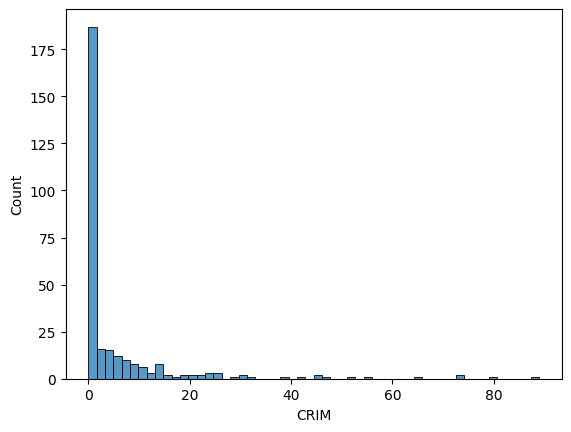

In [120]:
sns.histplot(X_train['CRIM'])

<Axes: ylabel='CRIM'>

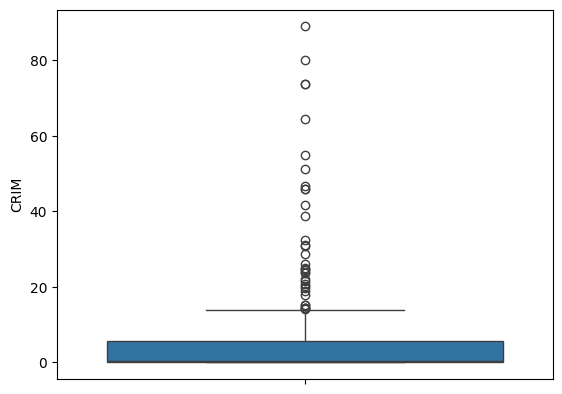

In [121]:
sns.boxplot(X_train['CRIM'])

In [122]:
X_train['CRIM'].describe()

count    296.000000
mean       5.824105
std       13.005187
min        0.006320
25%        0.080050
50%        0.344615
75%        5.667272
max       88.924127
Name: CRIM, dtype: float64

In [123]:
X_train['CRIM'].mode()

0       0.006320
1       0.009060
2       0.013010
3       0.013110
4       0.014320
         ...    
291    64.454622
292    73.534100
293    73.605747
294    79.902010
295    88.924127
Name: CRIM, Length: 296, dtype: float64

La columna CRIM posee una distribución sesgada a la derecha; la mayor cantidad de valores se encuentran en la tasa = 0.01501. La imputación de los 9 datos faltantes se realiza poe la mediana ya que es el dato más robusto por su distribución.

In [124]:
X_train['CRIM'] = X_train['CRIM'].fillna(value= X_train['CRIM'].median())

2. ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.

In [125]:
X_train['ZN'].describe()

count    293.000000
mean      13.118459
std       24.709123
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64

<Axes: xlabel='ZN', ylabel='Count'>

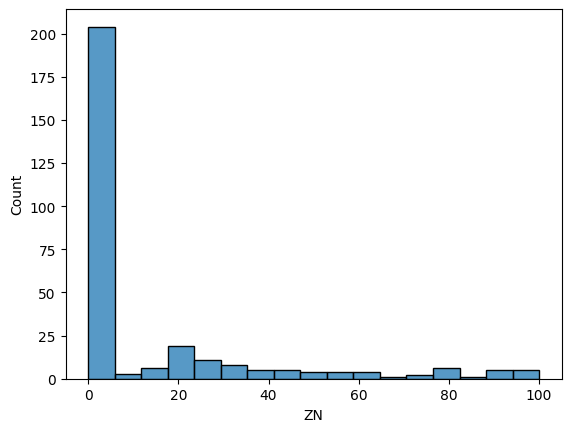

In [126]:
sns.histplot(X_train['ZN'])

<Axes: ylabel='ZN'>

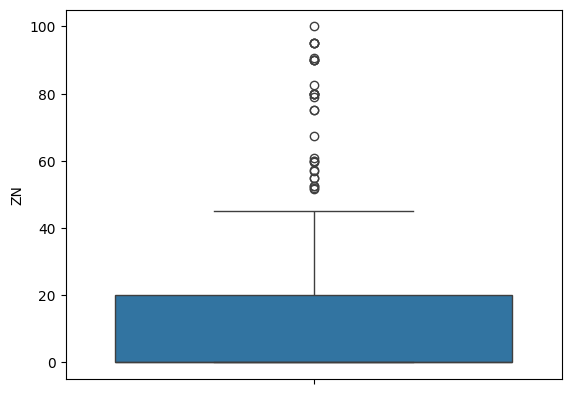

In [127]:
sns.boxplot(X_train['ZN'])

Se reemplazan los valores nulos por su moda (0.0) ya que se trata de la medida con representación entre los datos con una marcada diferencia (alrededor de 375 datos sobre 500 tienen este valor).

In [128]:
X_train['ZN'] = X_train['ZN'].fillna(value= X_train['ZN'].median())

3.  INDUS: proporción de acres de negocios no minoristas por ciudad

In [129]:
X_train['INDUS'].describe()

count    299.000000
mean      11.218608
std        6.754820
min        1.220000
25%        5.160000
50%        9.900000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

<Axes: xlabel='INDUS', ylabel='Count'>

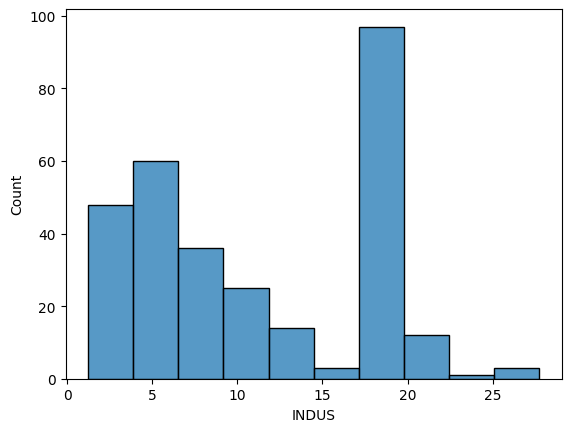

In [130]:
sns.histplot(X_train['INDUS'])

<Axes: ylabel='INDUS'>

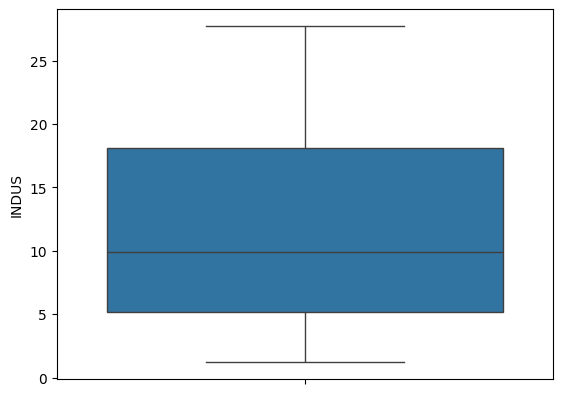

In [131]:
sns.boxplot(X_train['INDUS'])

Presenta una distribución sesgada a la derecha, con un pico en el valor 20; sin embargo, no presenta valores atípicos. Su mediana y media se encuentran en valores cercanos, se elige reemplazar por la mediana. 

In [132]:
X_train['INDUS'] = X_train['INDUS'].fillna(value= X_train['INDUS'].median())

4. CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)


<Axes: xlabel='CHAS', ylabel='Count'>

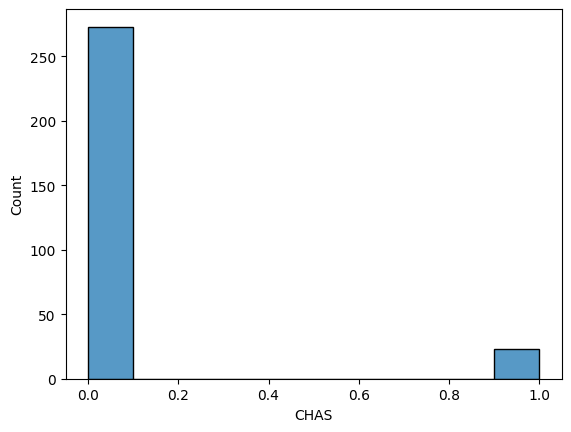

In [133]:
sns.histplot(X_train['CHAS'])

La mayoría de las viviendas no poseen un tramo que limita con el río, por lo que se decide imputar por la moda, ya que además se trata de una variable dummy.

In [134]:
X_train['CHAS'] = X_train['CHAS'].fillna(value= X_train['CHAS'].mode()[0])

5. NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]

<Axes: xlabel='NOX', ylabel='Count'>

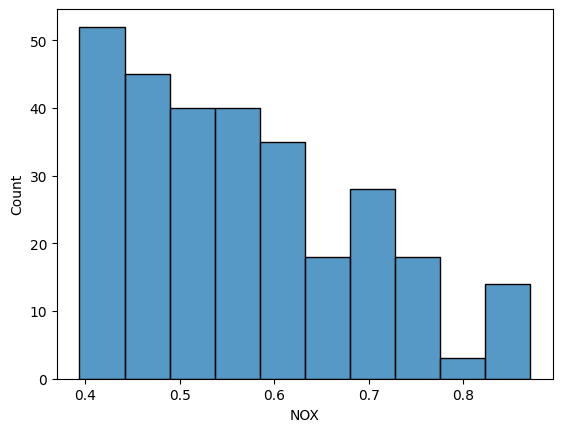

In [135]:
sns.histplot(X_train['NOX'])

<Axes: ylabel='NOX'>

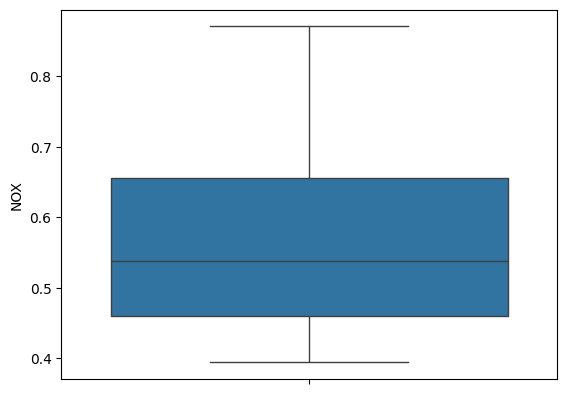

In [136]:
sns.boxplot(X_train['NOX'])

In [137]:
X_train['NOX'].describe()

count    293.000000
mean       0.569184
std        0.125546
min        0.394000
25%        0.460000
50%        0.538000
75%        0.655441
max        0.871000
Name: NOX, dtype: float64

La variable se encuentra levemente sesgada a la derecha, su media y mediana poseen valores similares. Se elige imputar por la mediana dado dicho sesgo leve.

In [138]:
X_train['NOX'] = X_train['NOX'].fillna(value = X_train['NOX'].median())

6. RM: número promedio de habitaciones por vivienda

<Axes: xlabel='RM', ylabel='Count'>

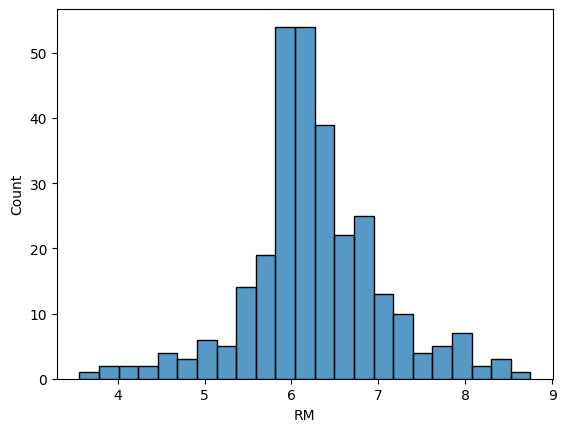

In [139]:
sns.histplot(X_train['RM'])

<Axes: ylabel='RM'>

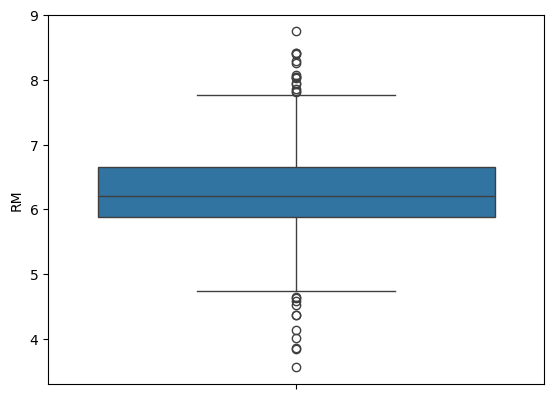

In [140]:
sns.boxplot(X_train['RM'])

In [141]:
X_train['RM'].describe()

count    297.000000
mean       6.264460
std        0.787395
min        3.561000
25%        5.888000
50%        6.208000
75%        6.657000
max        8.748910
Name: RM, dtype: float64

La variable se encuentra con una distribución normal, su media y mediana poseen valores similares. Sin embargo, se elige imputar por la mediana dada la presencia de muchos valores atípicos.

In [142]:
X_train['RM'] = X_train['RM'].fillna(value= X_train['RM'].median())

7. AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

In [143]:
X_train['AGE'].describe()

count    293.000000
mean      68.585876
std       28.804925
min        2.900000
25%       42.300000
50%       77.700000
75%       94.600000
max      100.000000
Name: AGE, dtype: float64

<Axes: xlabel='AGE', ylabel='Count'>

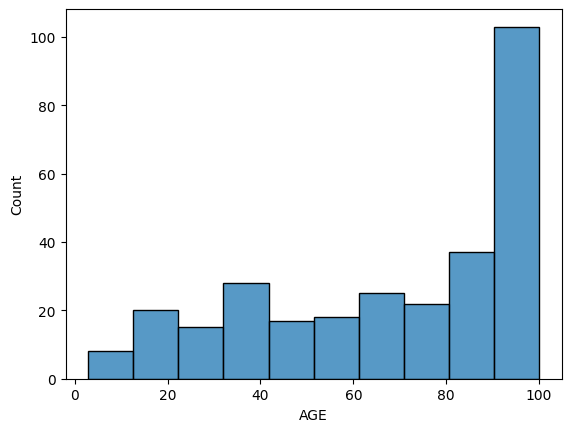

In [144]:
sns.histplot(X_train['AGE'])

<Axes: ylabel='AGE'>

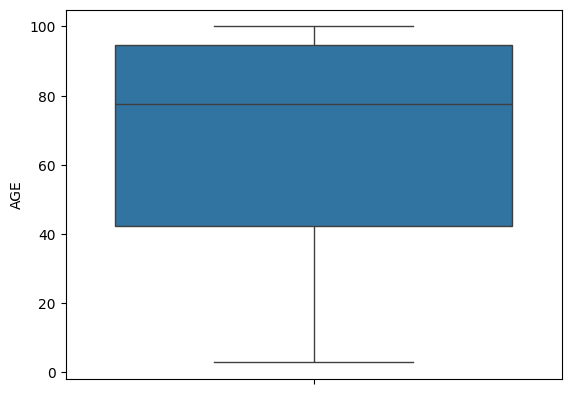

In [145]:
sns.boxplot(X_train['AGE'])

La distribución de la variable está fuertemente sesgada a la izquierda, presentando varios valores atípicos. Se decide imputar los valores faltantes por la mediana por dichas cuestiones.

In [146]:
X_train['AGE'] = X_train['AGE'].fillna(value = X_train['AGE'].median())

8. DIS (Distancias ponderadas a cinco centros de empleo de Boston)

In [163]:
X_train['DIS'].mode()

0    5.2873
1    5.4007
Name: DIS, dtype: float64

<Axes: xlabel='DIS', ylabel='Count'>

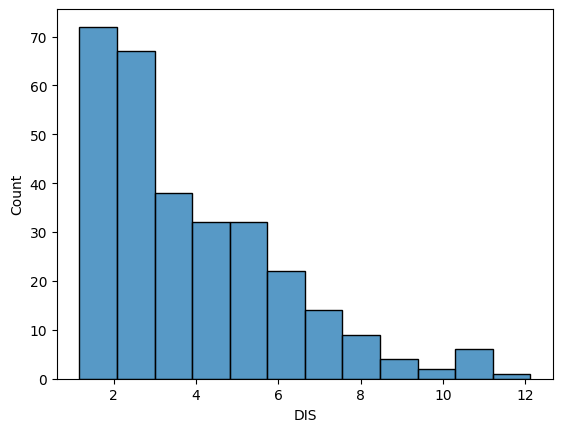

In [162]:
sns.histplot(X_train['DIS'])

<Axes: ylabel='DIS'>

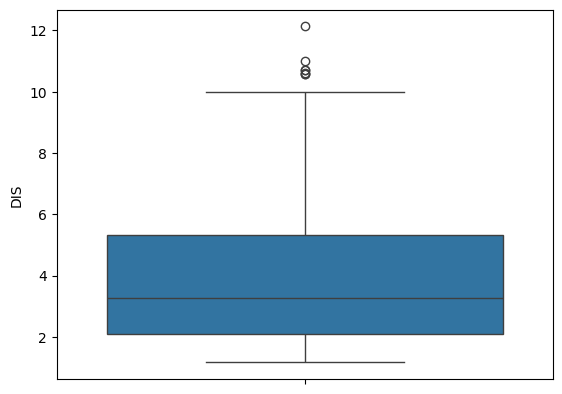

In [149]:
sns.boxplot(X_train['DIS'])

La distribución de la variable está fuertemente sesgada a la derecha, presentando varios valores atípicos. Se decide imputar los valores faltantes por la mediana por dichas cuestiones.

In [150]:
X_train['DIS'] = X_train['DIS'].fillna(value = X_train['DIS'].median())

9. RAD (Índice de accesibilidad a las autopistas radiales)

In [165]:
X_train['RAD'].describe()

count    299.000000
mean      10.408383
std        8.993663
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

<Axes: xlabel='RAD', ylabel='Count'>

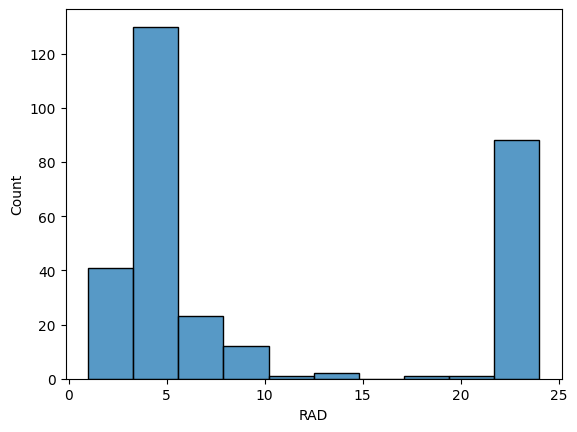

In [167]:
sns.histplot(X_train['RAD'])

Como se trata de una variable categórica ordinal con valor discreto, no se podría imputar por el promedio; también, dado que RAD tiene una distribución bimodal, la imputación más adecuada sería con la moda (el valor más frecuente). Esto aseguraría que los valores imputados reflejen la distribución original de la variable.

In [153]:
X_train['RAD'] = X_train['RAD'].fillna(value = X_train['RAD'].mode()[0])

10. TAX (Tasa de impuesto sobre la propiedad a valor completo por $10,000)

In [168]:
X_train['TAX'].describe()

510    437.0
328    270.0
280    289.0
207    403.0
206    330.0
       ...  
198    403.0
320    432.0
283    330.0
214    224.0
296    666.0
Name: TAX, Length: 299, dtype: float64

Como el impuesto suele depender del MEDV, agrupamos esta ultima variable en intervalos de a 5, obteniendo el valor de la mediana para cada variable en cada grupo.

In [155]:
df_test = X_test.join(y_test)

In [156]:
df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
457,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
167,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1
55,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
245,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
70,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
376,0.05372,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,27.1
22,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68,32.5
440,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9


In [157]:
# Definir los intervalos para agrupar los valores de MEDV en grupos de 5
bins = [5, 10, 15, 20, 25, 30, 35, 40, 45]  # Puedes ajustar el rango según tus datos
df_test =  X_test.join(y_test)
df_val = X_val.join(y_val)
df_sin_test = df - df_test -df_val

# Crear una nueva columna en el DataFrame que clasifica los valores de MEDV en los intervalos definidos
df_sin_test['MEDV_group'] = pd.cut(df_sin_test['MEDV'], bins=bins, labels=['>=5-10', '>10-15', '>15-20', '>20-25', '>25-30', '>30-35', '>35-40', '>40-45'])

# Agrupar el DataFrame por los grupos creados
grouped_df_sin_test = df_sin_test.groupby('MEDV_group').mean()

C:\Users\david\AppData\Local\Temp\ipykernel_6048\463480470.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_sin_test = df_sin_test.groupby('MEDV_group').mean()


In [158]:
grouped_df_sin_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV_group,,,,,,,,,,,,,,
>=5-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>15-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>20-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>25-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>30-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>35-40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>40-45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Definir una función para rellenar los valores faltantes con la mediana de su grupo
def fill_missing_tax(row):
    if pd.isnull(row['TAX']):
        # Calcular la mediana del grupo de MEDV al que pertenece
        median_tax = grouped_df_sin_test[grouped_df_sin_test['MEDV_group'] == row['MEDV_group']]['TAX'].median()
        return median_tax
    else:
        return row['TAX']

# Aplicar la función al DataFrame
X_train['TAX'] = X_train.apply(fill_missing_tax, axis=1)

KeyError: 'MEDV_group'

Una vez rellenados dichos valores, aún quedan dos valores nulos en la variable ya que la variable MEDV en dicha fila también es un dato nulo. A estos dos casos se 

In [260]:
X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        3
PTRATIO    6
B          4
LSTAT      4
dtype: int64

<Axes: xlabel='TAX', ylabel='Count'>

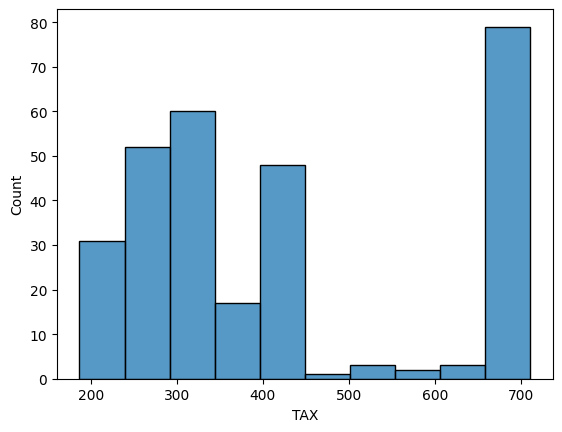

In [171]:
sns.histplot(X_train['TAX'])

<Axes: ylabel='TAX'>

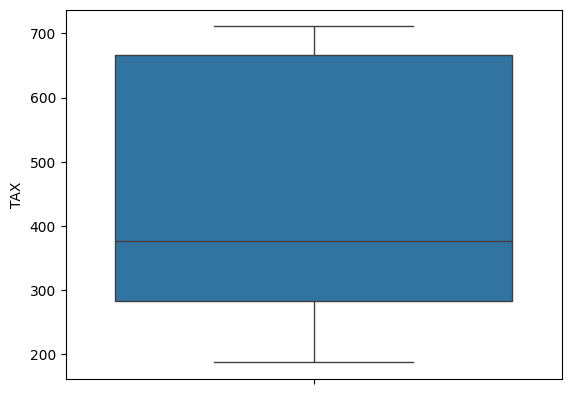

In [172]:
sns.boxplot(X_train['TAX'])

11.  PTRATIO: proporción alumno-maestro por ciudad

In [262]:
X_train['PTRATIO'].describe()

0    20.2
Name: PTRATIO, dtype: float64

<Axes: xlabel='PTRATIO', ylabel='Count'>

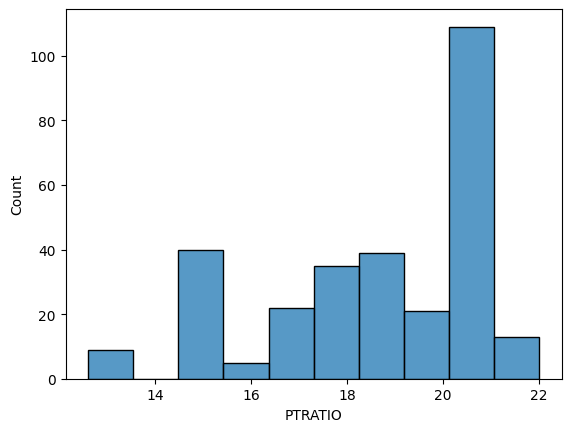

In [174]:
sns.histplot(X_train['PTRATIO'])

<Axes: ylabel='TAX'>

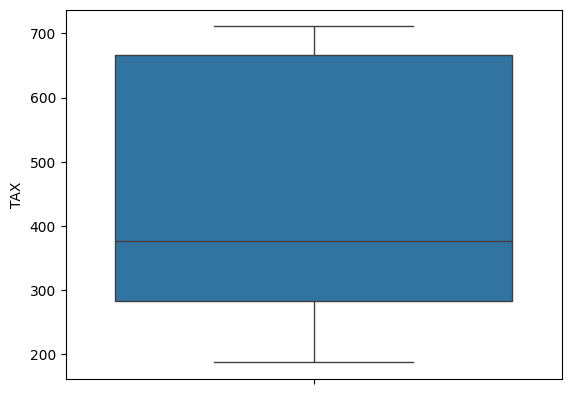

In [170]:
sns.boxplot(X_train['PTRATIO'])

La distribución de esta variable se encuentra sesgada a la izquierda, si bien no posee valores atípicos, se decide imputar los valores faltantes con la mediana ya que no presenta gran variación respecto al promedio.

In [265]:
X_train['PTRATIO'] = X_train['PTRATIO'].fillna(value = X_train['PTRATIO'].median())

12. B (Proporción de negros por ciudad - ecuación transformada)

In [176]:
X_train['B'].describe()

count    295.000000
mean     344.630571
std      102.811260
min        2.600000
25%      367.360000
50%      390.490000
75%      396.100000
max      396.900000
Name: B, dtype: float64

<Axes: xlabel='B', ylabel='Count'>

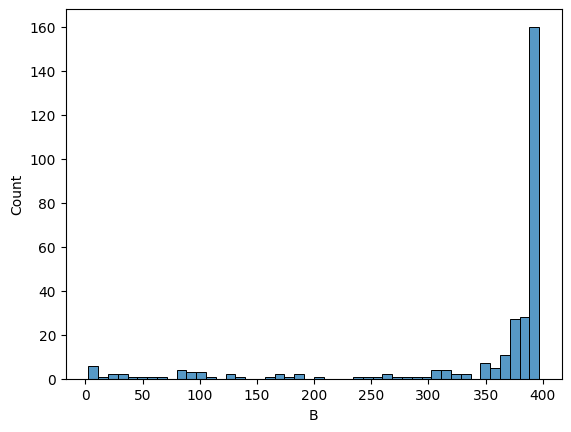

In [267]:
sns.histplot(X_train['B'])

<Axes: ylabel='B'>

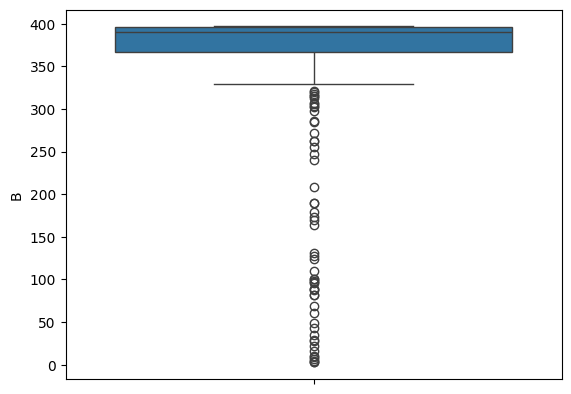

In [268]:
sns.boxplot(X_train['B'])

La variable se encuentra fuertemente sesgada a la izquierda además de presentar una gran cantidad de valores atípicos; es por esto que se decide imputar los valores faltantes por laa mediana.

In [269]:
X_train['B'] = X_train['B'].fillna(value = X_train['B'].median())

13. LSTAT: % de población de menor estatus socioeconómico.

In [178]:
X_train['LSTAT'].describe()

count    295.000000
mean      13.058785
std        7.655632
min        1.730000
25%        7.280000
50%       10.771067
75%       17.270000
max       36.980000
Name: LSTAT, dtype: float64

<Axes: xlabel='LSTAT', ylabel='Count'>

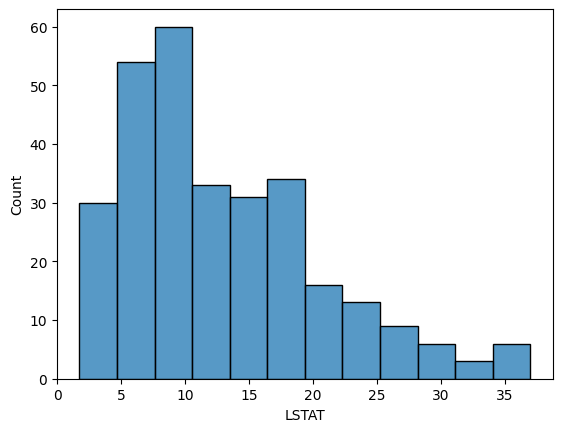

In [271]:
sns.histplot(X_train['LSTAT'])

<Axes: ylabel='LSTAT'>

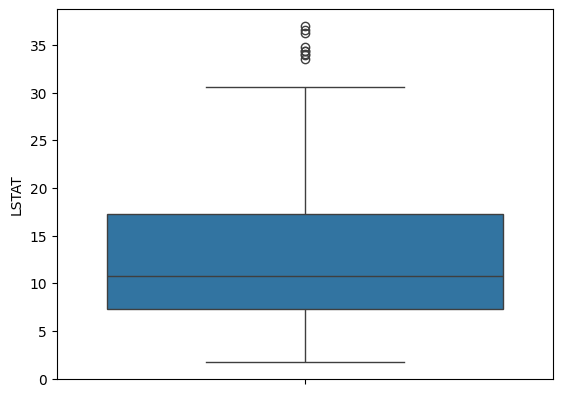

In [272]:
sns.boxplot(X_train['LSTAT'])

La distribución se encuentra sesgada hacia la derecha, presentando valores atípicos en dicha zona; se decide realizar la imputación por la mediana.

In [273]:
X_train['LSTAT'] = X_train['LSTAT'].fillna(value = X_train['LSTAT'].median())

In [274]:
X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        3
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## 2. Matriz de correlacion ##

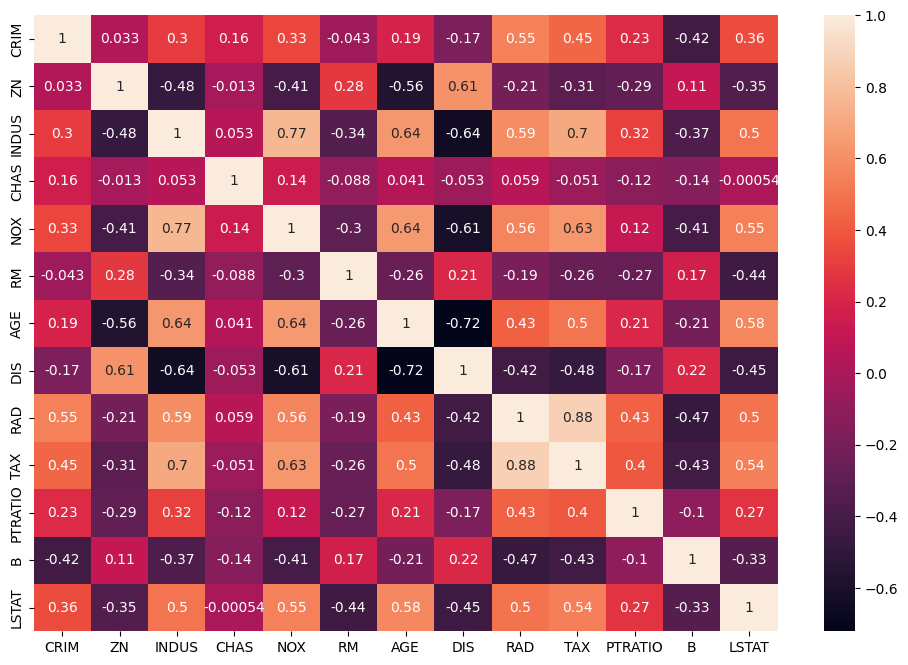

In [279]:
# Establecer el tamaño de la figura (ancho, alto) en pulgadas
plt.figure(figsize=(12, 8))

# Crear el heatmap con anotaciones
sns.heatmap(X_train.corr(), annot=True)

# Mostrar el gráfico
plt.show()

## 3. Estandarización o escalado de datos. ##